<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/covid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/corona_tested.csv')
data.head()

<ipython-input-3-44251d66b151>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Data_Science/corona_tested.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [4]:
row,col = data.shape
print(row)
print(col)

278848
11


In [5]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [6]:
data.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [7]:
select_col = ['Ind_ID']

In [8]:
select_col_df = data[['Ind_ID']]
select_col_df = select_col_df.describe()
select_col_df

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [9]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Ind_ID
mean,139424.5


In [10]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([139424.5])

In [11]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [13]:
data_counts = data['Known_contact'].value_counts()
non_diab = data[data['Known_contact'] == 0].iloc[0:268]
daib = data[data['Known_contact'] == 1]
data1 = pd.concat([non_diab,daib]).sample(frac = 1)
data1['Known_contact'].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
data.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


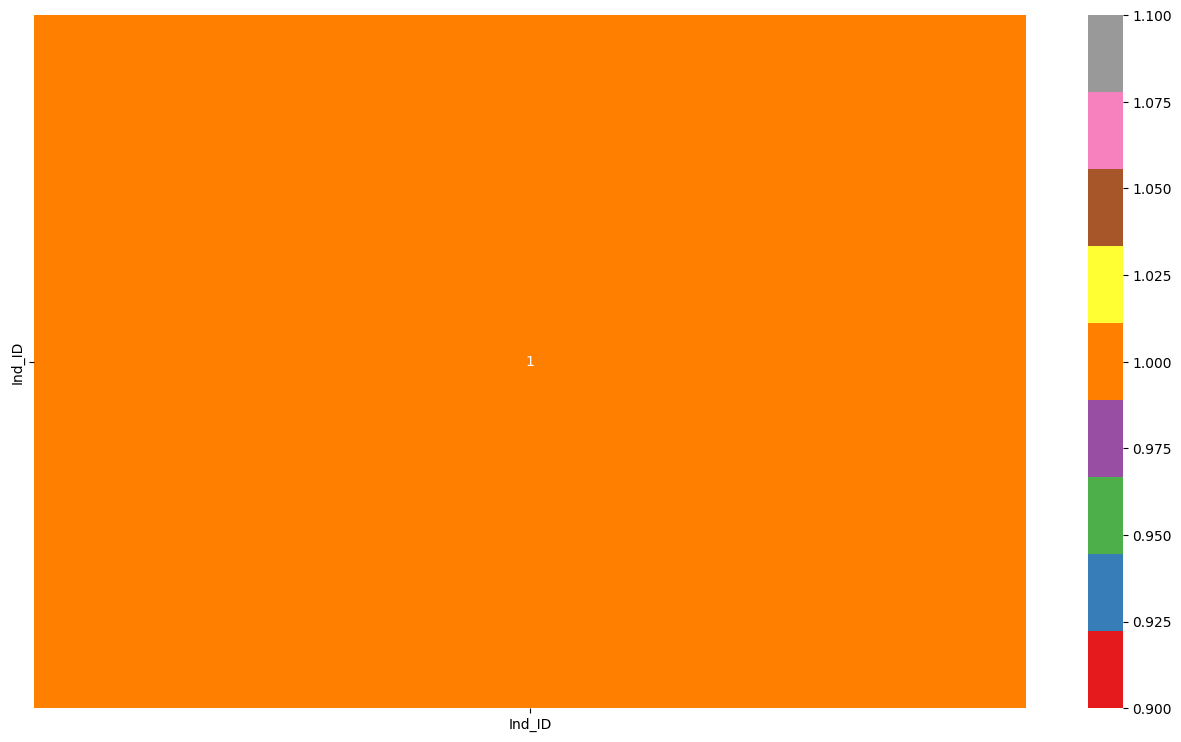

In [17]:
plt.figure(figsize=(16,9))
corr = data[data.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [22]:
# training and normalization of data
X = data.iloc[:,:10].values
Y = data.iloc[:,10:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [19]:
# # Fitting Linear Regression to the dataset
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,Y_train)

In [23]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=8, max_iter=800)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

ValueError: could not convert string to float: '05-04-2020'

In [ ]:
test_data = data.iloc[101:102]
output = test_data['Outcome']
test_data.drop(['Outcome'], axis = 1, inplace = True)
print("Predicted output = ",model.predict(test_data)[0])
print("Actual Output = ", output.values[0])

In [ ]:
print("The train accuracy score = ",round(model.score(X_train,Y_train)*100,2))
print("The test accuracy score = ",round(model.score(X_test,Y_test)*100,2))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test,prediction))